In [1]:
import numpy as np

1.1.    Implementation of the differential equation Algorithm 2

In [2]:
def f(tn, yn, beta, delta_E, mu_E, delta_J, mu_J, alpha, omega, mu_A):
    E = yn[0]
    J = yn[1]
    A = yn[2]
    dE = beta*A - delta_E*E - mu_E*E
    dJ = delta_E*E - delta_J*J - alpha*J*J - mu_J*J
    dA = omega*delta_J*J - mu_A*A
    dy = np.array([dE, dJ, dA])
    return dy

1.2.    Implementation of the Ranga Kutta 4 Algorithm 1

In [3]:
def RK4(f,yn, tn, h):
    k1 = f(tn, yn)
    k2 = f((tn+(1/2)*h), (yn+(1/2)*h*k1))
    k3 = f((tn+(1/2)*h), (yn+(1/2)*h*k2))
    k4 = f((tn+h), (yn+h*k3))
    yn1 = yn + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)
    return yn1

2.  Declaration of the variables provided

In [4]:
beta = 24.0
delta_E = 0.6
mu_E = 0.15
delta_J = 0.08
mu_J = 0.05
alpha = 0.003
omega = 0.5
mu_A = 0.1
t0 = 0
tend = 365.0
h = 0.01
y0 = np.array([10.0, 0.0, 0.0])

3.  Creation of a vector T where the elements follow the pattern to+ h*(i-1)

In [5]:
# Number of steps
n = int((tend - t0) / h) + 1

# Initialize arrays to store time and solution values
T = np.linspace(t0, tend, n)

4.  Creating a wrapper function to call the function f along with the parameters as the algorithm 2 does not allow the use of the extra parameters required by the function from algorithm 1.

In [6]:
def f_wrapper(tn, yn):
    return f(tn, yn, beta, delta_E, mu_E, delta_J, mu_J, alpha, omega, mu_A)

5.  Initializing a new variable Y to save the generated values.
    Creating a for-loop which iterated over the integers 1 to tend/h as mentioned in the task.

In [7]:
# Initialize solution array
Y = np.zeros((n, 3))
Y[0] = y0

# Time-stepping loop
for i in range(1, n):
    Y[i] = RK4(f_wrapper, Y[i-1], T[i-1], h)

6.  Creation of plots as specified by the task.

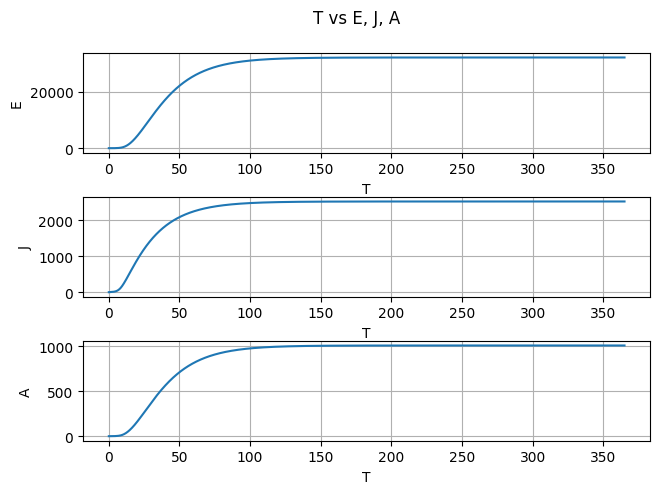

In [9]:
# Importing library for plotting
import matplotlib.pyplot as plt

# Creating a figure
fig, axs = plt.subplots(3)
fig.suptitle('T vs E, J, A')
fig.tight_layout()
# Plot T vs E, Plot T vs J and Plot T vs A
for i in range(3):
    axs[i].plot(T, Y[:, i])
    axs[i].set_xlabel('T')
    if i == 0:
        axs[i].set_ylabel('E')
    elif i == 1:
        axs[i].set_ylabel('J')
    else:
        axs[i].set_ylabel('A')
    axs[i].grid()